In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

<Figure size 1008x576 with 0 Axes>

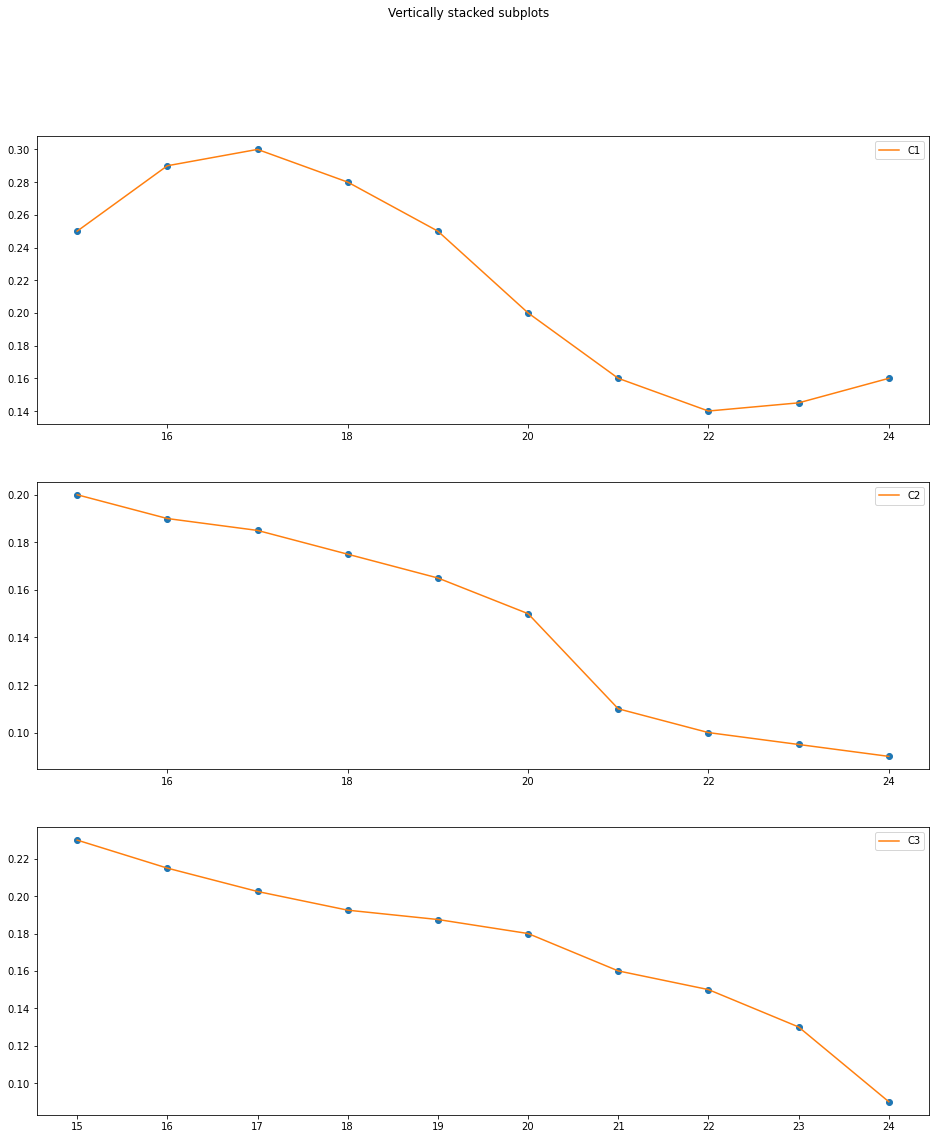

In [44]:
# discrete values of price
prices = np.linspace(15.0, 24.0, num=10, endpoint=True)

# discrete values of bids
bids = []

#customer categories
categories = ["C1", "C2", "C3"] 
#c1 - TRUE TRUE
#c2 - FALSE FALSE (NO ONLINE, NO SPESSO)
#c3 - TF FT

probabilities = [[0.25, 0.29, 0.30, 0.28, 0.25, 0.20, 0.16, 0.14, 0.145, 0.16],
                 [0.20, 0.19, 0.185, 0.175, 0.165, 0.15, 0.11, 0.10, 0.095, 0.09],
                 [0.23, 0.215, 0.2025, 0.1925, 0.1875, 0.18, 0.16, 0.15, 0.13, 0.09]]


plt.figure(figsize=(14,8))
fig, axs = plt.subplots(3, figsize=(16,18))
fig.suptitle('Vertically stacked subplots')
plt.xticks(x)
for i in range(0,len(probabilities)):
    y = probabilities[i]
    x = prices
    f2 = interp1d(x, y, kind='cubic')
    
    axs[i].plot(x, y, 'o') ##
    #plt.plot(x, f(x), '-', label="linear")
    axs[i].plot(x, f2(x), '-', label=categories[i])
    axs[i].legend(loc='best')

In [ ]:
plt.figure()

#only the first one is shown uo to now
y = probabilities[0]
x = prices
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

plt.xticks(x)

plt.plot(x, y, 'o', label="data")
#plt.plot(x, f(x), '-', label="linear")
plt.plot(x, f2(x), '--', label="cubic")

plt.legend(loc='best')
plt.title("Interpolation options")
plt.xlabel("Price")
plt.ylabel("Conversion Rate")

plt.show()

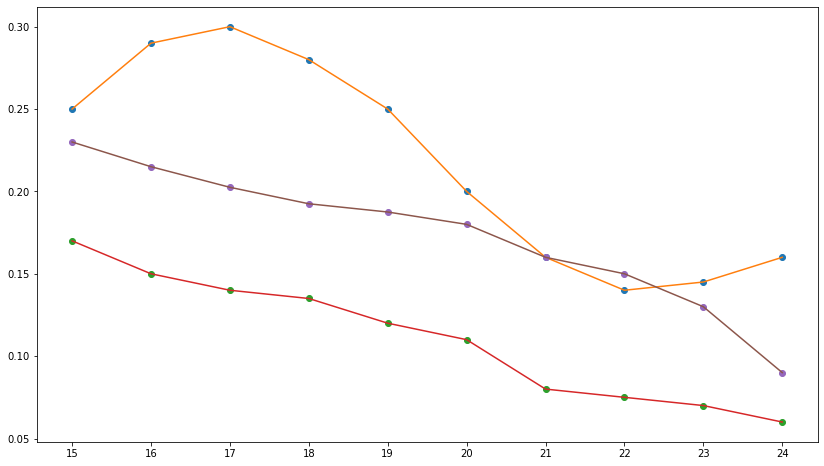

In [53]:
# discrete values of price
prices = np.linspace(15.0, 24.0, num=10, endpoint=True)

# discrete values of bids
bids = []

#customer categories
categories = ["C1", "C2", "C3"] 
#c1 - TRUE TRUE
#c2 - FALSE FALSE (NO ONLINE, NO SPESSO)
#c3 - TF FT

probabilities = [[0.25, 0.29, 0.30, 0.28, 0.25, 0.20, 0.16, 0.14, 0.145, 0.16],
                 [0.17, 0.15, 0.14, 0.135, 0.12, 0.11, 0.08, 0.075, 0.07, 0.06],
                 [0.23, 0.215, 0.2025, 0.1925, 0.1875, 0.18, 0.16, 0.15, 0.13, 0.09]]


plt.figure(figsize=(14,8))
plt.xticks(x)
for i in range(0,len(probabilities)):
    y = probabilities[i]
    x = prices
    f2 = interp1d(x, y, kind='cubic')
    
    plt.plot(x, y, 'o') ##
    plt.plot(x, f2(x), '-', label=categories[i])
plt.show()

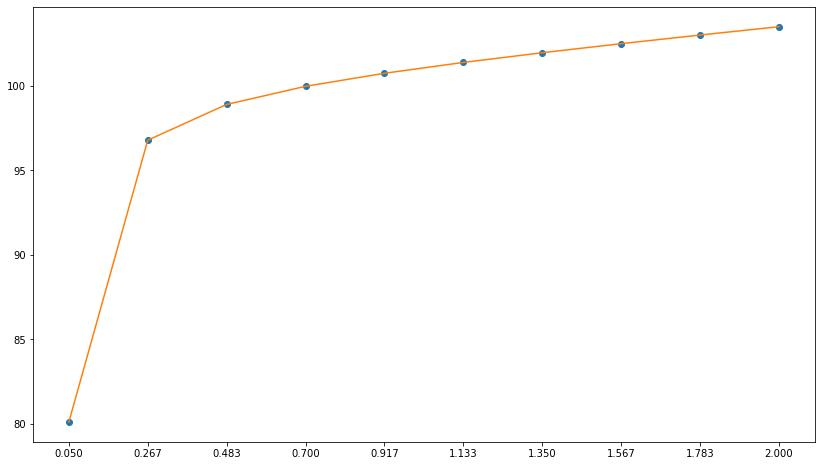

In [85]:
# discrete values of price
prices = np.linspace(15.0, 24.0, num=10, endpoint=True)

# discrete values of bids
bids = np.linspace(0.05, 2.0, num=10, endpoint=True)
#bids = np.array([0.03, 0.04, 0.07, 0.10, 0.18, 0.29, 0.47, 0.77, 1.20, 2.0])

#customer categories
#categories = ["C1", "C2", "C3"] 
#c1 - TRUE TRUE
#c2 - FALSE FALSE (NO ONLINE, NO SPESSO)
#c3 - TF FT

clicks = [np.logspace(0.0, 200.0, num=10, endpoint=True),]
          #[0.17, 0.15, 0.14, 0.135, 0.12, 0.11, 0.08, 0.075, 0.07, 0.06],
          #[0.23, 0.215, 0.2025, 0.1925, 0.1875, 0.18, 0.16, 0.15, 0.13, 0.09]]


plt.figure(figsize=(14,8))
plt.xticks(bids)

for i in range(0,len(clicks)):
    x = bids
    y = (2*x**2-1)/x + 100
    f2 = interp1d(x, y, kind='linear')
    
    plt.plot(x, y, 'o') ##
    plt.plot(x, f2(x), '-', label=categories[i])
plt.show()

In [86]:
y = (2*x**2-1)/x + 100
y

array([ 80.1       ,  96.78333333,  98.89770115,  99.97142857,
       100.74242424, 101.38431373, 101.95925926, 102.49503546,
       103.005919  , 103.5       ])